In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import rand_score

RANDOM_SEED = 42

In [36]:
df = pd.read_excel('data3.xlsx')
df = df.drop(df.columns[[0, 1]], axis=1)
X = df

In [37]:
mean_X = X.mean()
std_X = X.std()

#нормализация тренировочных и тестовых данных
for column in X.columns:
    X[column] = (X[column] - mean_X[column]) / std_X[column]

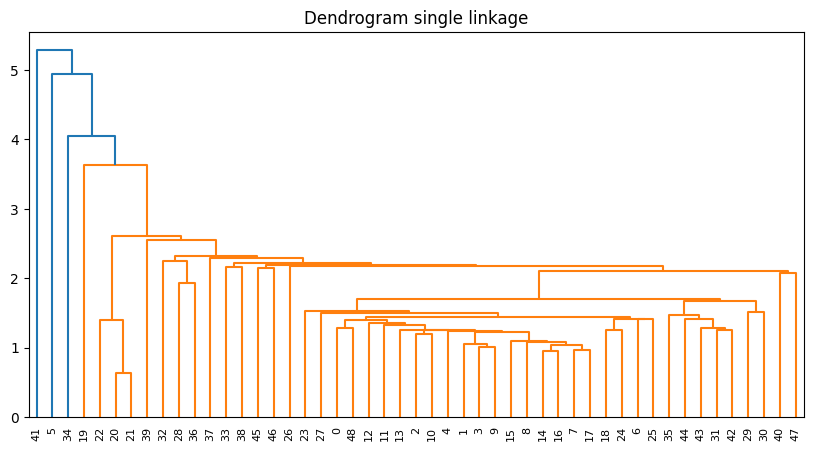

In [38]:
# Построение матрицы связей
Z = linkage(X, method='single')

# Построение дендрограммы
plt.figure(figsize=(10, 5))
plt.title(f'Dendrogram single linkage')
dendrogram(Z)
plt.show()

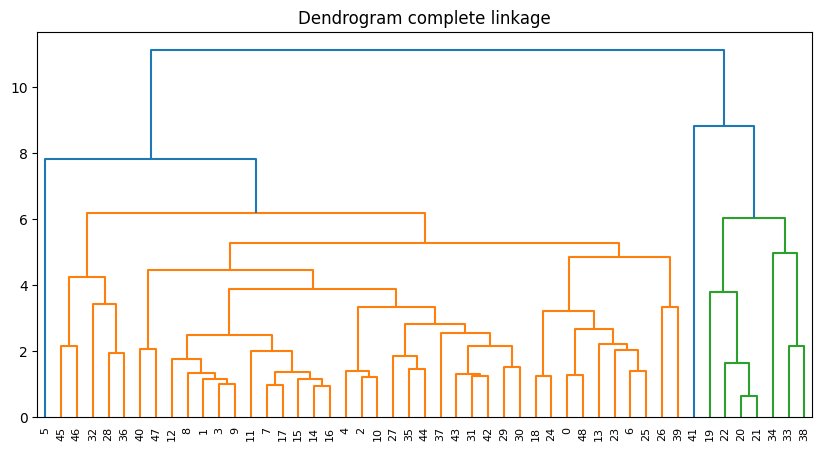

In [39]:
# Построение матрицы связей
Z = linkage(X, method='complete')

# Построение дендрограммы
plt.figure(figsize=(10, 5))
plt.title(f'Dendrogram complete linkage')
dendrogram(Z)
plt.show()

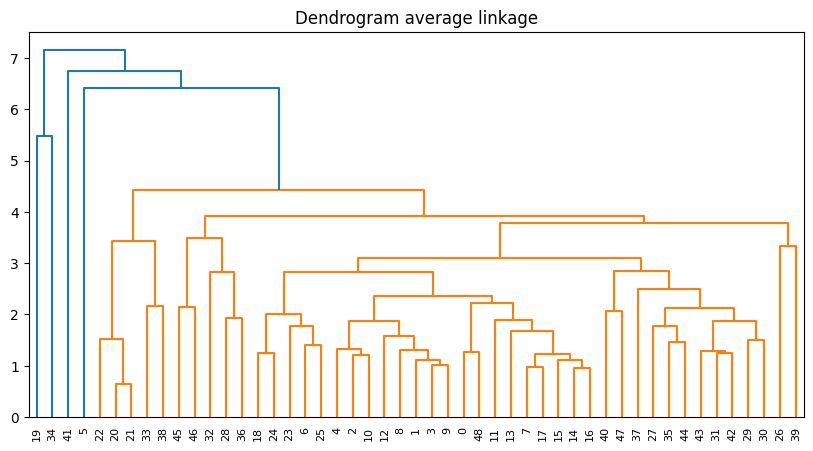

In [40]:
# Построение матрицы связей
Z = linkage(X, method='average')

# Построение дендрограммы
plt.figure(figsize=(10, 5))
plt.title(f'Dendrogram average linkage')
dendrogram(Z)
plt.show()

In [41]:
best_model = AgglomerativeClustering(linkage='complete', n_clusters=4)

best_model.fit(X)

# Предсказание кластеров
predicted_labels = best_model.fit_predict(X)
predicted_labels

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0])

In [42]:
def davies_bouldin_score(estimator, X):
    estimator.fit(X)
    labels = estimator.labels_
    score = metrics.davies_bouldin_score(X, labels)
    return score

kmeans = KMeans()

param_grid = {'n_clusters': range(2, 50, 1)}

grid = GridSearchCV(kmeans, param_grid=param_grid, cv=5, scoring=davies_bouldin_score)
grid.fit(X)

print(grid.best_params_)

/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/

{'n_clusters': 4}


/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/6w/mgkv1n_175b82c7kcfgb_kwr0000gn/T/ipykernel_52391/300679764.py", line 2, in davies_bouldin_score
    estimator.fit(X)
  File "/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py", line 1484, in fit
    self._check

In [43]:
knn = KMeans(n_clusters=4, random_state=RANDOM_SEED)
knn.fit(X)
knn.labels_

/Users/radicalovich/PycharmProjects/PAD/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 0, 1, 3, 0, 0, 0, 3, 2, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0], dtype=int32)

In [44]:
# Вычисление индекса Рэнда между предсказанными метками из пункта 3 и пункта 4
rand_index = rand_score(predicted_labels, knn.predict(X))
print("Индекс Рэнда между кластеризациями из пунктов 3 и 4:", rand_index)

Индекс Рэнда между кластеризациями из пунктов 3 и 4: 0.6003401360544217


In [45]:
labels = knn.labels_

# Добавление меток кластеров к исходным данным
X_labeled = X.copy()
X_labeled['Cluster'] = labels

# Расчет средних значений для каждого кластера
cluster_means = X_labeled.groupby('Cluster').mean()
cluster_means

,х1,х2,х3,х4,х5,х6,x7,x8,x9
Cluster,,,,,,,,,
0,0.060393,-0.541650,-0.214980,0.500239,0.553504,-0.227262,0.072397,-0.103088,0.821573
1,-0.529136,0.774356,0.301442,0.009262,-0.306430,-0.011414,-0.113674,-0.314172,-0.428128
2,1.714902,-1.102478,-0.931954,-1.510305,-0.101507,-0.937973,-1.238630,1.842982,-0.408651
3,-0.253844,-0.238748,0.623329,0.572957,-0.170111,2.045171,2.017056,-0.888555,-0.008847


In [46]:
X_labeled

,х1,х2,х3,х4,х5,х6,x7,x8,x9,Cluster
0,-0.280973,0.548318,0.888058,0.539395,-0.567038,-0.031663,-0.353830,-0.681734,0.248116,1
1,-0.823540,0.727197,-0.931954,0.035960,-0.861058,-0.415693,-0.309431,-0.240968,-0.226771,1
2,-0.925272,1.406937,-1.593777,0.203771,0.143510,-0.507860,-0.686819,0.250655,0.084965,1
3,-0.721809,0.727197,-0.766499,0.287677,-0.346523,0.398451,-0.198435,-0.351159,-0.440907,1
4,-0.721809,0.941852,-1.593777,-0.215758,0.266018,0.168033,-0.109637,-0.020585,-0.426340,1
5,-0.687898,0.906076,1.549881,-0.047946,-0.861058,5.360117,0.733936,-0.986879,-1.249380,3
6,-0.959182,1.156506,1.384425,0.455489,-0.714048,-0.431054,0.023558,0.038749,-1.078945,1
7,-0.450525,0.584094,0.557147,-0.215758,-0.028002,0.659591,-0.065239,-0.681734,-0.896856,1
8,-0.755719,1.263834,-0.104676,-0.299664,-0.812054,-0.200636,-0.020840,-0.537637,-0.653586,1
9,-0.687898,0.906076,-0.601043,0.035960,-0.542536,0.214116,-0.398228,-0.927545,0.229179,1
